In [11]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

census = pd.read_csv('../Week15/census.csv')
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [ ]:
## Procesos ETL

In [12]:
census.shape

(3220, 37)

In [13]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [14]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

In [15]:
census.dropna(inplace=True)
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3218 non-null int64
State              3218 non-null object
County             3218 non-null object
TotalPop           3218 non-null int64
Men                3218 non-null int64
Women              3218 non-null int64
Hispanic           3218 non-null float64
White              3218 non-null float64
Black              3218 non-null float64
Native             3218 non-null float64
Asian              3218 non-null float64
Pacific            3218 non-null float64
Citizen            3218 non-null int64
Income             3218 non-null float64
IncomeErr          3218 non-null float64
IncomePerCap       3218 non-null int64
IncomePerCapErr    3218 non-null int64
Poverty            3218 non-null float64
ChildPoverty       3218 non-null float64
Professional       3218 non-null float64
Service            3218 non-null float64
Office             3218 non-null float64
Constru

In [16]:
##Vista de Outliers

Rango intercuartil : Distancia entre el cuartil 1 y 3 (-3 sigmas y +3 sigmas)

SyntaxError: invalid syntax (<ipython-input-16-c3109b4fe5dc>, line 3)

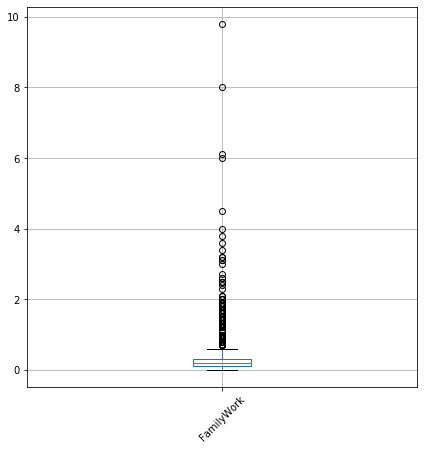

In [17]:
plt.figure(figsize=(7,7))
census.boxplot(column=['FamilyWork'])
plt.xticks(rotation=45)
plt.show()

In [20]:
import numpy as np
q1, q3 = np.percentile(census.FamilyWork,[25,75])
iqr = q3 -q1
upper = q3 +(3*iqr)
lower = q3 - (3*iqr)
print(census[census.FamilyWork < lower])

Empty DataFrame
Columns: [CensusId, State, County, TotalPop, Men, Women, Hispanic, White, Black, Native, Asian, Pacific, Citizen, Income, IncomeErr, IncomePerCap, IncomePerCapErr, Poverty, ChildPoverty, Professional, Service, Office, Construction, Production, Drive, Carpool, Transit, Walk, OtherTransp, WorkAtHome, MeanCommute, Employed, PrivateWork, PublicWork, SelfEmployed, FamilyWork, Unemployment]
Index: []

[0 rows x 37 columns]


In [21]:
census_clean = census.loc[census.FamilyWork<upper].copy()
census_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3020 non-null int64
State              3020 non-null object
County             3020 non-null object
TotalPop           3020 non-null int64
Men                3020 non-null int64
Women              3020 non-null int64
Hispanic           3020 non-null float64
White              3020 non-null float64
Black              3020 non-null float64
Native             3020 non-null float64
Asian              3020 non-null float64
Pacific            3020 non-null float64
Citizen            3020 non-null int64
Income             3020 non-null float64
IncomeErr          3020 non-null float64
IncomePerCap       3020 non-null int64
IncomePerCapErr    3020 non-null int64
Poverty            3020 non-null float64
ChildPoverty       3020 non-null float64
Professional       3020 non-null float64
Service            3020 non-null float64
Office             3020 non-null float64
Constru

In [22]:
census.shape

(3218, 37)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E85761D080>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

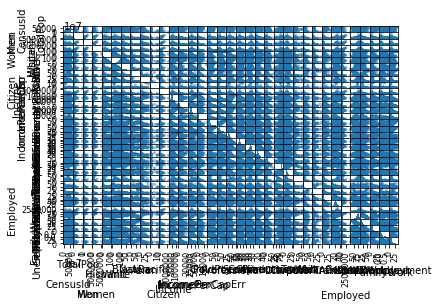

In [23]:
pd.plotting.scatter_matrix(census_clean)

In [24]:
def escala(x):
    return (x/100)

In [29]:
conversion = ['Hispanic','White','Black','Native','Asian','Pacific','Poverty','Service','Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork',]

In [30]:
n_columnas = [x+'Rate' for x in conversion]
census_clean[n_columnas] = census_clean[conversion].apply(escala)
census_clean.NativeRate.head()

0    0.004
1    0.006
2    0.002
3    0.004
4    0.003
Name: NativeRate, dtype: float64

In [31]:
from sklearn.preprocessing import MinMaxScaler
census_clean['TotalPopScaled'] = MinMaxScaler().fit_transform(census_clean.TotalPop.values.reshape(-1,1))
census_clean.TotalPopScaled.describe()

count    3020.000000
mean        0.010478
std         0.032757
min         0.000000
25%         0.001265
50%         0.002822
75%         0.007227
max         1.000000
Name: TotalPopScaled, dtype: float64

In [32]:
#one-hot encoding
estados = pd.get_dummies(census_clean.State,drop_first = True) #borra el primer dato del dataframe para que no de la diagonal 
# de 1 en la matriz de correlación
census_dummy = pd.concat([census_clean,estados],axis = 1).copy()
census_dummy.columns.values

array(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomeErr', 'IncomePerCap',
       'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive',
       'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ServiceRate', 'OfficeRate', 'ConstructionRate',
       'ProductionRate', 'DriveRate', 'CarpoolRate', 'TransitRate',
       'WalkRate', 'OtherTranspRate', 'WorkAtHomeRate', 'EmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'TotalPopScaled', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Flo

In [33]:
#Suffling: Muestra aleatoria sin reemplazo
s_census = census_dummy.sample(frac = 1)
s_census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2424,46127,South Dakota,Union,14842,7476,7366,3.0,93.0,0.3,0.4,...,1,0,0,0,0,0,0,0,0,0
2325,45019,South Carolina,Charleston,372904,180654,192250,5.1,63.2,28.5,0.2,...,0,0,0,0,0,0,0,0,0,0
2027,38075,North Dakota,Renville,2562,1294,1268,2.5,95.9,0.2,0.5,...,0,0,0,0,0,0,0,0,0,0
1285,26109,Michigan,Menominee,23717,11972,11745,1.6,93.7,0.3,2.0,...,0,0,0,0,0,0,0,0,0,0
2485,47115,Tennessee,Marion,28306,13861,14445,1.5,92.3,1.5,0.3,...,0,1,0,0,0,0,0,0,0,0


In [35]:
census_sample_proporcion = census_dummy.sample(frac=0.5)
census_sample_observation = census_dummy.sample(n = 1000)
print(census_sample_observation.shape,census_sample_proporcion.shape)

(1000, 109) (1510, 109)


In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(s_census,test_size=0.2)#Nuestro dataset de prueba es el 20% del dataset completo
print(test.shape,train.shape)

(604, 109) (2416, 109)
